In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spacenet-an-optimally-distributed-astronomy-data/SpaceNet.FLARE.imam_alam/planet/planet_page_7_image_16_4_SwinIR_large.png
/kaggle/input/spacenet-an-optimally-distributed-astronomy-data/SpaceNet.FLARE.imam_alam/planet/planet_page_12_image_4_2_SwinIR_large.png
/kaggle/input/spacenet-an-optimally-distributed-astronomy-data/SpaceNet.FLARE.imam_alam/planet/planet_page_7_image_9_3_SwinIR_large.png
/kaggle/input/spacenet-an-optimally-distributed-astronomy-data/SpaceNet.FLARE.imam_alam/planet/planet_page_17_image_20_3_SwinIR_large.png
/kaggle/input/spacenet-an-optimally-distributed-astronomy-data/SpaceNet.FLARE.imam_alam/planet/planet_page_20_image_5_1_SwinIR_large.png
/kaggle/input/spacenet-an-optimally-distributed-astronomy-data/SpaceNet.FLARE.imam_alam/planet/planet_page_21_image_17_2_SwinIR_large.png
/kaggle/input/spacenet-an-optimally-distributed-astronomy-data/SpaceNet.FLARE.imam_alam/planet/planet_page_11_image_2_2_SwinIR_large.png
/kaggle/input/spacenet-an-optimally-dist

In [2]:
import os
import cv2
import glob
import random
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pathlib import Path

# Krishna Sikheriya - IIT2023139
# Issue #37: Data Exploration on Kaggle

# We search for the specific folder name dynamically to avoid errors
input_root = "/kaggle/input"
dataset_name = [d for d in os.listdir(input_root) if "spacenet" in d.lower()][0]
DATASET_PATH = os.path.join(input_root, dataset_name)
print(f"Dataset found at: {DATASET_PATH}")

Dataset found at: /kaggle/input/spacenet-an-optimally-distributed-astronomy-data


### Load Data & Identify Classes

In [3]:
data_info = []


try:
    classes = [d for d in os.listdir(DATASET_PATH) if os.path.isdir(os.path.join(DATASET_PATH, d))]
    if not classes:
        inner_dir = os.listdir(DATASET_PATH)[0]
        DATASET_PATH = os.path.join(DATASET_PATH, inner_dir)
        classes = [d for d in os.listdir(DATASET_PATH) if os.path.isdir(os.path.join(DATASET_PATH, d))]
except Exception as e:
    print(f"Error locating classes: {e}")

print(f"Classes Found ({len(classes)}): {classes}")

for class_name in classes:
    class_dir = os.path.join(DATASET_PATH, class_name)
    images = glob.glob(os.path.join(class_dir, "*"))
    
    for img_path in images:
        data_info.append({
            "class": class_name,
            "path": img_path
        })

df = pd.DataFrame(data_info)
print(f"Total Images: {len(df)}")
df.head()

Classes Found (1): ['SpaceNet.FLARE.imam_alam']
Total Images: 8


,class,path
0,SpaceNet.FLARE.imam_alam,/kaggle/input/spacenet-an-optimally-distribute...
1,SpaceNet.FLARE.imam_alam,/kaggle/input/spacenet-an-optimally-distribute...
2,SpaceNet.FLARE.imam_alam,/kaggle/input/spacenet-an-optimally-distribute...
3,SpaceNet.FLARE.imam_alam,/kaggle/input/spacenet-an-optimally-distribute...
4,SpaceNet.FLARE.imam_alam,/kaggle/input/spacenet-an-optimally-distribute...


### Visualization & Analysis

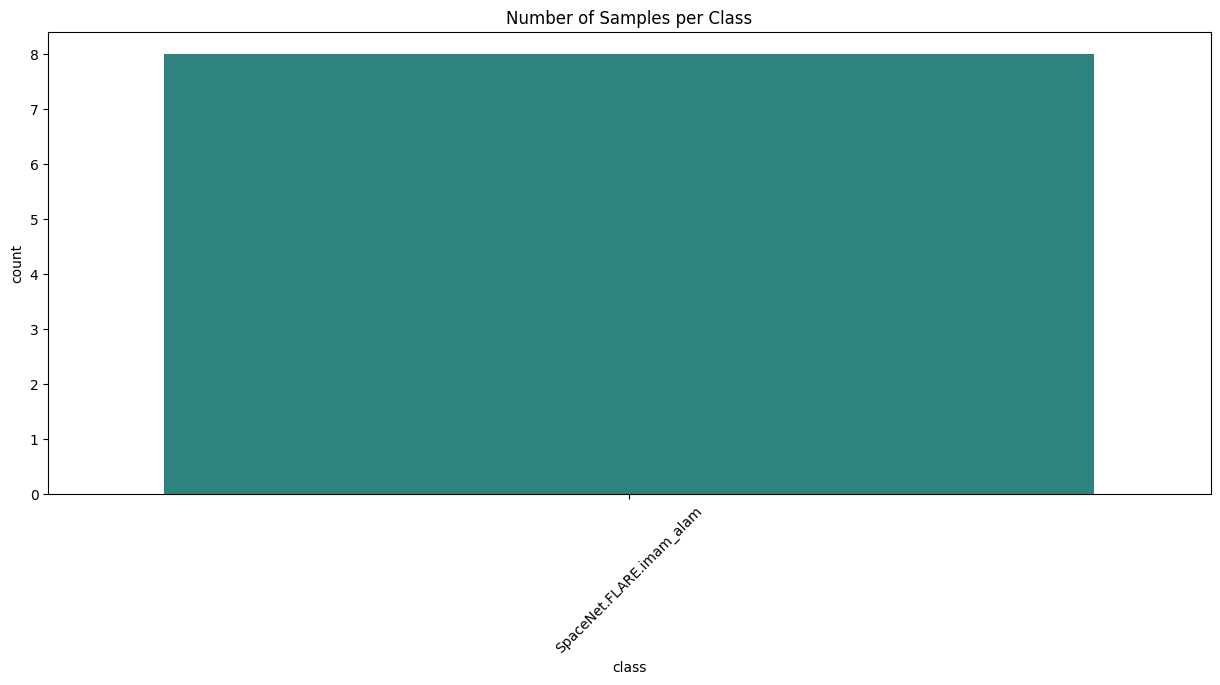

<Figure size 1500x1000 with 0 Axes>

In [8]:
# 1. Class Distribution
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x='class', order=df['class'].value_counts().index, palette='viridis')
plt.title("Number of Samples per Class")
plt.xticks(rotation=45)
plt.show()

# 2. Visualize Samples
plt.figure(figsize=(15, 10))

# Loop through the first 5 classes
for i, class_name in enumerate(classes[:5]):
    class_dir = os.path.join(DATASET_PATH, class_name)
    
    # Get all files
    image_files = glob.glob(os.path.join(class_dir, "*"))
    
    if image_files:
        # Try finding a valid image (retry logic if we hit a bad file)
        valid_image_found = False
        attempts = 0
        
        while not valid_image_found and attempts < 10:
            img_path = random.choice(image_files)
            img = cv2.imread(img_path)
            
            # Check if image loaded correctly
            if img is not None:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                
                plt.subplot(1, 5, i + 1)
                plt.imshow(img)
                plt.title(class_name)
                plt.axis("off")
                valid_image_found = True
            else:
                # If load failed, pick another one
                attempts += 1
                
plt.tight_layout()
plt.show()